In [23]:
import pandas as pd

In [24]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [26]:
#Remove the first column
df = df.iloc[:, 1:]

# Save the modified DataFrame to a new CSV file
output_file_path = 'edited_breast_cancer.csv'
df.to_csv(output_file_path, index=False)

print(f"File '{output_file_path}' created with the first column removed.")

File 'edited_breast_cancer.csv' created with the first column removed.


In [27]:
df = pd.read_csv("edited_breast_cancer.csv")
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Replace "?" with 0
df.replace('?', 0, inplace=True)

# Assuming the last column is the target variable, adjust as needed
X = df.iloc[:, :10]  # Select the first 10 columns as features
y = df.iloc[:, -1]   # Assuming the last column is the target variable

# Convert DataFrame values to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the kNN classifier
k_value = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.57%


Accuracy: 93.57%


/var/folders/r7/z_mmy21d125cl_xgld2kbrlm0000gn/T/ipykernel_98062/3054809818.py:38: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  xx, yy = pd.np.meshgrid(pd.np.arange(x_min, x_max, h), pd.np.arange(y_min, y_max, h))
/var/folders/r7/z_mmy21d125cl_xgld2kbrlm0000gn/T/ipykernel_98062/3054809818.py:39: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  Z = knn_classifier.predict(pd.np.c_[xx.ravel(), yy.ravel()])
/Users/saurav/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


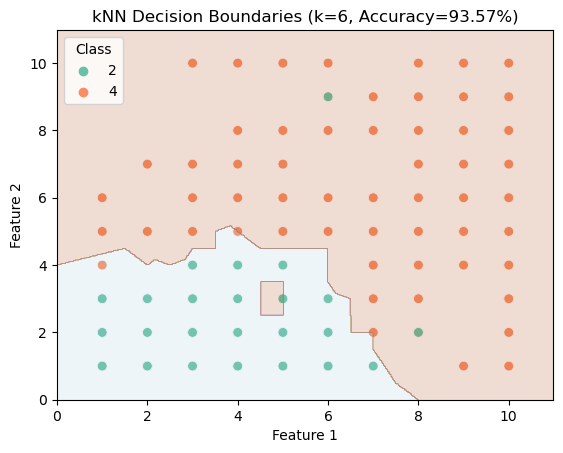

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace "?" with 0
df.replace('?', 0, inplace=True)

# Assuming the last column is the target variable, adjust as needed
X = df.iloc[:, :2]   # Select only the first 2 columns as features
y = df.iloc[:, -1]   # Assuming the last column is the target variable

# Convert DataFrame values to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the kNN classifier with k=6
k_value = 6
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the data points
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='Set2', marker='o', s=50)

# Plot decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = pd.np.meshgrid(pd.np.arange(x_min, x_max, h), pd.np.arange(y_min, y_max, h))
Z = knn_classifier.predict(pd.np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'kNN Decision Boundaries (k={k_value}, Accuracy={accuracy * 100:.2f}%)')

# Show the plot
plt.show()